In [1]:
import pandas as pd
from sklearn import preprocessing
import numpy as np
from sklearn.linear_model import Lasso
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.preprocessing import StandardScaler 
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import cross_val_score
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import GaussianNB
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import VotingClassifier
from sklearn.svm import SVC

In [2]:
df = pd.read_csv("final_features.csv", index_col=0)

In [3]:
cols_to_drop = ['rank', 'comp_year', 'categories']

### Split train, val and test data

In [4]:
df_train = df[df.comp_year < 2017]
df_val   = df[df.comp_year == 2017]
df_test  = df[df.comp_year == 2018]

In [5]:
X_train = df_train.drop(cols_to_drop, axis=1).values
y_train = df_train['rank'].values

X_val = df_val.drop(cols_to_drop, axis=1).values
y_val = df_val['rank'].values

X_test = df_test.drop(cols_to_drop, axis=1).values

### Feature preparation and normalization

In [6]:
scaler = StandardScaler()
scaler.fit(X_train)

X_train = scaler.transform(X_train)
X_val = scaler.transform(X_val)
X_test = scaler.transform(X_test)

### Classify the ranks into x buckets

In [7]:
N_BUCKETS = 10

In [8]:
y_train = y_train.astype(np.int)
y_val = y_val.astype(np.int)

In [9]:
y_train = y_train // N_BUCKETS
y_val = y_val // N_BUCKETS

In [17]:
model = GradientBoostingClassifier(n_estimators=500, max_depth=3)
model.fit(X_train, y_train)

GradientBoostingClassifier(criterion='friedman_mse', init=None,
              learning_rate=0.1, loss='deviance', max_depth=3,
              max_features=None, max_leaf_nodes=None,
              min_impurity_decrease=0.0, min_impurity_split=None,
              min_samples_leaf=1, min_samples_split=2,
              min_weight_fraction_leaf=0.0, n_estimators=500,
              presort='auto', random_state=None, subsample=1.0, verbose=0,
              warm_start=False)

In [18]:
model.score(X_val, y_val)

0.18

### Plot feature importance

In [19]:
N_TOP_FEATURES = 5

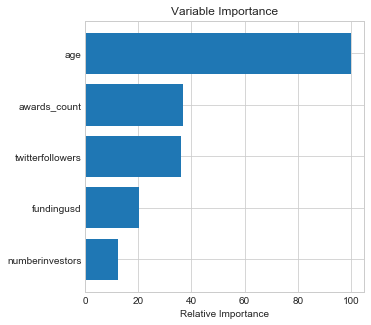

In [20]:
# Plot feature importance
feature_importance = model.feature_importances_
# make importances relative to max importance
feature_importance = 100.0 * (feature_importance / feature_importance.max())
sorted_idx = np.argsort(feature_importance)
pos = np.arange(sorted_idx.shape[0]) + .5

plt.figure(figsize=(5,5))

sns.set_style("whitegrid")
#ax = sns.barplot(pos, feature_importance[sorted_idx])

plt.barh(pos[-N_TOP_FEATURES:], feature_importance[sorted_idx][-N_TOP_FEATURES:], align='center')
plt.yticks(pos[-N_TOP_FEATURES:], df.drop(cols_to_drop, axis=1).columns[sorted_idx][-N_TOP_FEATURES:])
plt.xlabel('Relative Importance')
plt.title('Variable Importance')
plt.show()

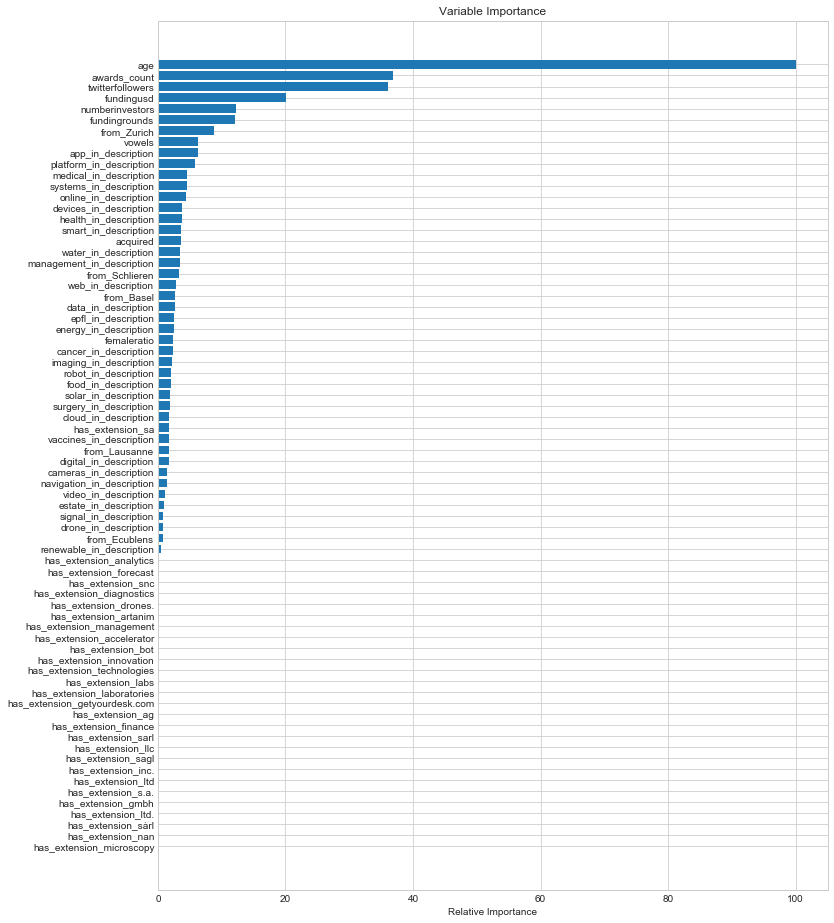

In [21]:
# Plot feature importance
feature_importance = model.feature_importances_
# make importances relative to max importance
feature_importance = 100.0 * (feature_importance / feature_importance.max())
sorted_idx = np.argsort(feature_importance)
pos = np.arange(sorted_idx.shape[0]) + .5

plt.figure(figsize=(12,16))

sns.set_style("whitegrid")
#ax = sns.barplot(pos, feature_importance[sorted_idx])

plt.barh(pos, feature_importance[sorted_idx], align='center')
plt.yticks(pos, df.drop(cols_to_drop, axis=1).columns[sorted_idx])
plt.xlabel('Relative Importance')
plt.title('Variable Importance')
plt.show()

In [22]:
y_pred = model.predict(X_test)
df = pd.read_csv("merged_data_final.csv")
df  = df[df.comp_year == 2018]
list(df[y_pred <= 3]['cleanname'])

['TasteHit',
 'Interprefy',
 'smart-me',
 'SThAR',
 'SONECT',
 'Smeetz',
 'Spark Horizon',
 'ARCATrust']